In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(trainX, trainy), (testX, testy) = tf.keras.datasets.mnist.load_data()

In [3]:
trainX.shape

(60000, 28, 28)

In [4]:
trainy.shape

(60000,)

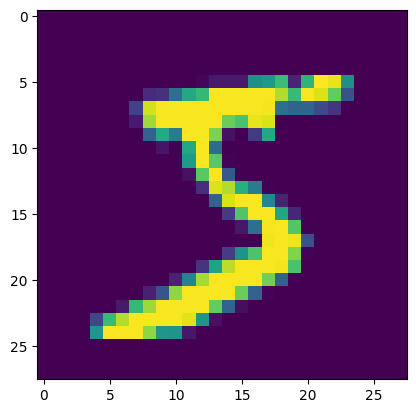

In [5]:
plt.imshow(trainX[0])

In [6]:
train_images = trainX/255
test_images = testX/255

In [7]:
dataset_images = tf.data.Dataset.from_tensor_slices(train_images)

In [8]:
dataset_images

<TensorSliceDataset shapes: (28, 28), types: tf.float64>

In [9]:
dataset_labels = tf.data.Dataset.from_tensor_slices(trainy)

In [10]:
dataset_labels

<TensorSliceDataset shapes: (), types: tf.uint8>

In [11]:
dataset = tf.data.Dataset.zip((dataset_images, dataset_labels))

In [12]:
dataset

<ZipDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

In [13]:
batch_size = 256
dataset = dataset.shuffle(train_images.shape[0]).repeat().batch(batch_size)

# L1, L2 test

In [14]:
model_dense_0 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [15]:
model_dense_0.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
steps_per_epoch = train_images.shape[0]/batch_size

In [17]:
history_dense_0 = model_dense_0.fit(dataset, 
                                    epochs=40, 
                                    steps_per_epoch=steps_per_epoch, 
                                   validation_data=(testX, testy))

Epoch 1/40
235/234 [==============================] - 3s 12ms/step - loss: 0.3023 - accuracy: 0.9072 - val_loss: 16.3992 - val_accuracy: 0.9620
Epoch 2/40
235/234 [==============================] - 3s 11ms/step - loss: 0.0952 - accuracy: 0.9710 - val_loss: 15.5821 - val_accuracy: 0.9706
Epoch 3/40
235/234 [==============================] - 3s 12ms/step - loss: 0.0610 - accuracy: 0.9816 - val_loss: 12.5064 - val_accuracy: 0.9764
Epoch 4/40
235/234 [==============================] - 3s 12ms/step - loss: 0.0432 - accuracy: 0.9863 - val_loss: 12.3865 - val_accuracy: 0.9803
Epoch 5/40
235/234 [==============================] - 3s 12ms/step - loss: 0.0343 - accuracy: 0.9888 - val_loss: 16.2860 - val_accuracy: 0.9755
Epoch 6/40
235/234 [==============================] - 3s 12ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 15.6738 - val_accuracy: 0.9790
Epoch 7/40
235/234 [==============================] - 3s 12ms/step - loss: 0.0247 - accuracy: 0.9923 - val_loss: 17.8179 - val_accuracy:

In [18]:
print(history_dense_0.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [19]:
# model_dense_1 = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28, 28)),
#     tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(0.01)),
#     tf.keras.layers.Dense(512, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(0.01)),
#     tf.keras.layers.Dense(256, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(0.01)),
#     tf.keras.layers.Dense(128, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(0.01)),
#     tf.keras.layers.Dense(64, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(0.01)),
#     tf.keras.layers.Dense(32, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(0.01)),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])
model_dense_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [20]:
model_dense_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
steps_per_epoch = train_images.shape[0]/batch_size

In [21]:
history_dense_1 = model_dense_1.fit(dataset, epochs=40, 
                                    steps_per_epoch=steps_per_epoch, 
                                    validation_data=(testX, testy))

Epoch 1/40
235/234 [==============================] - 7s 28ms/step - loss: 1.6099 - accuracy: 0.9030 - val_loss: 16.7237 - val_accuracy: 0.9624
Epoch 2/40
235/234 [==============================] - 6s 27ms/step - loss: 0.4606 - accuracy: 0.9695 - val_loss: 12.3264 - val_accuracy: 0.9720
Epoch 3/40
235/234 [==============================] - 6s 27ms/step - loss: 0.2361 - accuracy: 0.9801 - val_loss: 11.8178 - val_accuracy: 0.9788
Epoch 4/40
235/234 [==============================] - 6s 27ms/step - loss: 0.1428 - accuracy: 0.9855 - val_loss: 11.9579 - val_accuracy: 0.9776
Epoch 5/40
235/234 [==============================] - 6s 27ms/step - loss: 0.0971 - accuracy: 0.9887 - val_loss: 14.0987 - val_accuracy: 0.9775
Epoch 6/40
235/234 [==============================] - 7s 28ms/step - loss: 0.0693 - accuracy: 0.9919 - val_loss: 12.1411 - val_accuracy: 0.9807
Epoch 7/40
235/234 [==============================] - 6s 28ms/step - loss: 0.0574 - accuracy: 0.9926 - val_loss: 13.3224 - val_accuracy:

In [22]:
print(history_dense_1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [23]:
model_dense_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer =tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [24]:
model_dense_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
steps_per_epoch = train_images.shape[0]/batch_size

In [25]:
history_dense_2 = model_dense_2.fit(dataset, epochs=40, 
                                    steps_per_epoch=steps_per_epoch, 
                                    validation_data=(testX, testy))

Epoch 1/40
235/234 [==============================] - 8s 34ms/step - loss: 0.5386 - accuracy: 0.9088 - val_loss: 18.5031 - val_accuracy: 0.9655
Epoch 2/40
235/234 [==============================] - 8s 33ms/step - loss: 0.2085 - accuracy: 0.9708 - val_loss: 13.3750 - val_accuracy: 0.9740
Epoch 3/40
235/234 [==============================] - 8s 32ms/step - loss: 0.1336 - accuracy: 0.9812 - val_loss: 17.5986 - val_accuracy: 0.9705
Epoch 4/40
235/234 [==============================] - 8s 33ms/step - loss: 0.0935 - accuracy: 0.9860 - val_loss: 13.1359 - val_accuracy: 0.9785
Epoch 5/40
235/234 [==============================] - 8s 33ms/step - loss: 0.0689 - accuracy: 0.9894 - val_loss: 15.6792 - val_accuracy: 0.9769
Epoch 6/40
235/234 [==============================] - 8s 32ms/step - loss: 0.0509 - accuracy: 0.9913 - val_loss: 13.7151 - val_accuracy: 0.9800
Epoch 7/40
235/234 [==============================] - 8s 32ms/step - loss: 0.0387 - accuracy: 0.9931 - val_loss: 16.8303 - val_accuracy:

In [26]:
print(history_dense_2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


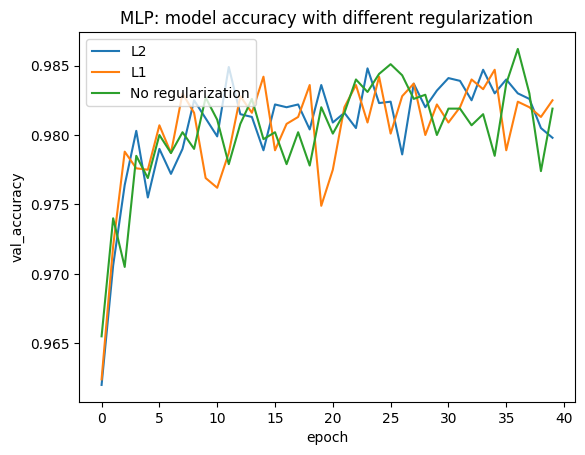

In [27]:
import matplotlib.pyplot as plt
plt.plot(history_dense_0.history['val_accuracy'])
plt.plot(history_dense_1.history['val_accuracy'])
plt.plot(history_dense_2.history['val_accuracy'])
plt.title('MLP: model accuracy with different regularization')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['L2', 'L1', 'No regularization'], loc='upper left')
plt.show()

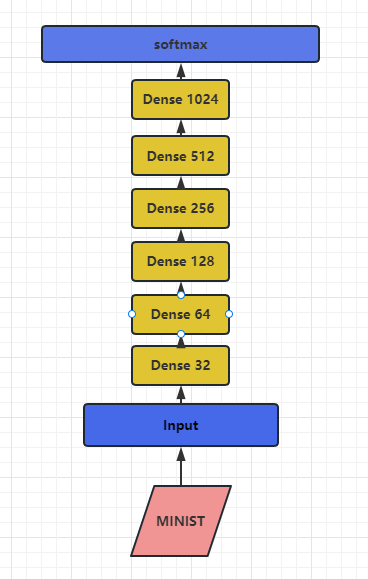

# Dropout test

In [28]:
model_dense_2_drop = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1,noise_shape=None,seed=None),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [29]:
model_dense_2_drop.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
steps_per_epoch = train_images.shape[0]/batch_size

In [30]:
history_dense_2_drop = model_dense_2_drop.fit(dataset, epochs=40,
                                              steps_per_epoch=steps_per_epoch,
                                              validation_data=(testX, testy))

Epoch 1/40
235/234 [==============================] - 9s 36ms/step - loss: 0.3507 - accuracy: 0.8977 - val_loss: 20.4654 - val_accuracy: 0.9627
Epoch 2/40
235/234 [==============================] - 8s 35ms/step - loss: 0.1115 - accuracy: 0.9691 - val_loss: 16.9610 - val_accuracy: 0.9709
Epoch 3/40
235/234 [==============================] - 8s 35ms/step - loss: 0.0770 - accuracy: 0.9781 - val_loss: 17.9839 - val_accuracy: 0.9722
Epoch 4/40
235/234 [==============================] - 8s 35ms/step - loss: 0.0538 - accuracy: 0.9849 - val_loss: 13.7200 - val_accuracy: 0.9777
Epoch 5/40
235/234 [==============================] - 8s 35ms/step - loss: 0.0451 - accuracy: 0.9869 - val_loss: 14.7031 - val_accuracy: 0.9776
Epoch 6/40
235/234 [==============================] - 8s 35ms/step - loss: 0.0365 - accuracy: 0.9895 - val_loss: 16.6332 - val_accuracy: 0.9777
Epoch 7/40
235/234 [==============================] - 8s 35ms/step - loss: 0.0318 - accuracy: 0.9911 - val_loss: 19.3324 - val_accuracy:

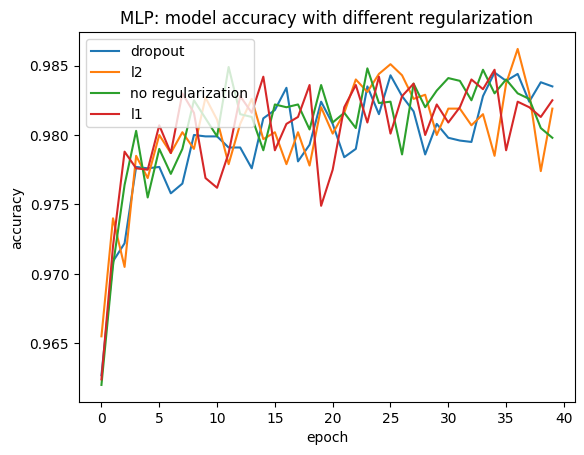

In [31]:
import matplotlib.pyplot as plt
plt.plot(history_dense_2_drop.history['val_accuracy'])
plt.plot(history_dense_2.history['val_accuracy'])
plt.plot(history_dense_0.history['val_accuracy'])
plt.plot(history_dense_1.history['val_accuracy'])
plt.title('MLP: model accuracy with different regularization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['dropout', 'l2', 'no regularization', 'l1'], loc='upper left')
plt.show()

In [32]:
history_dense_2_drop.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

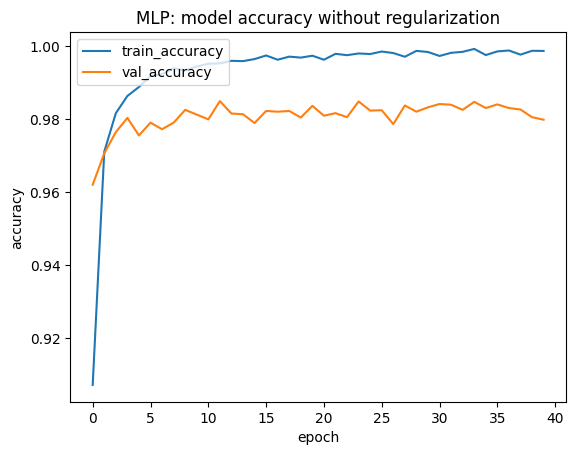

In [33]:
import matplotlib.pyplot as plt
plt.plot(history_dense_0.history['accuracy'])
plt.plot(history_dense_0.history['val_accuracy'])
plt.title('MLP: model accuracy without regularization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
plt.show()

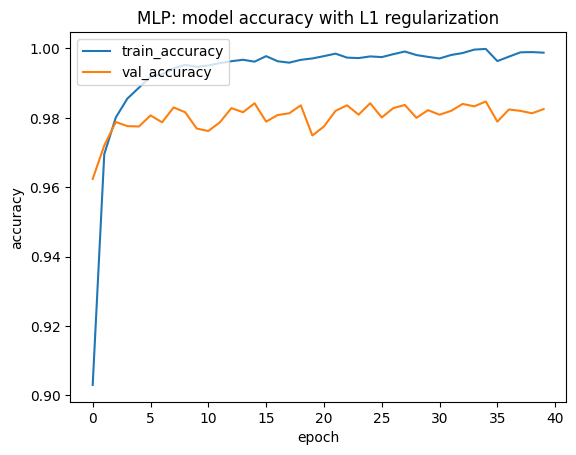

In [34]:
import matplotlib.pyplot as plt
plt.plot(history_dense_1.history['accuracy'])
plt.plot(history_dense_1.history['val_accuracy'])
plt.title('MLP: model accuracy with L1 regularization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
plt.show()

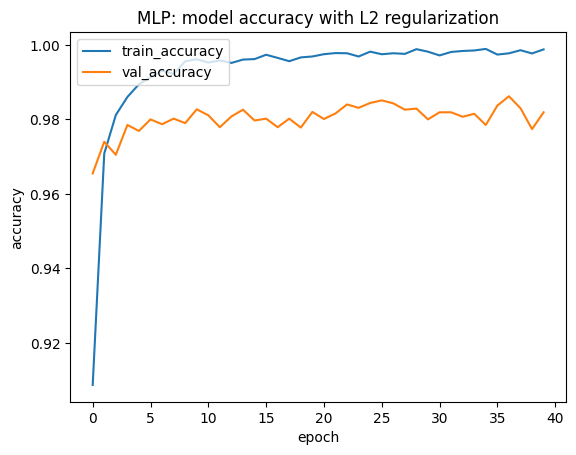

In [35]:
import matplotlib.pyplot as plt
plt.plot(history_dense_2.history['accuracy'])
plt.plot(history_dense_2.history['val_accuracy'])
plt.title('MLP: model accuracy with L2 regularization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
plt.show()

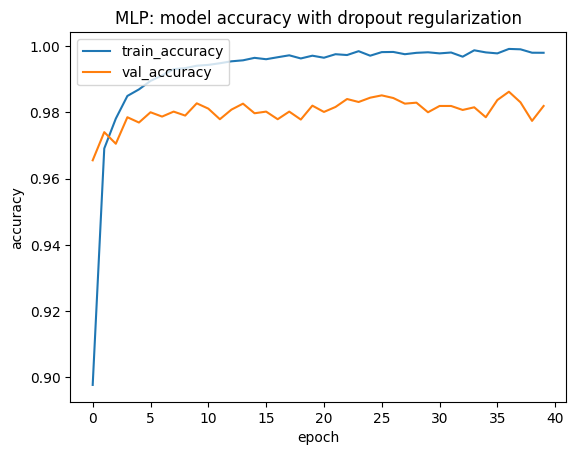

In [36]:
import matplotlib.pyplot as plt
plt.plot(history_dense_2_drop.history['accuracy'])
plt.plot(history_dense_2.history['val_accuracy'])
plt.title('MLP: model accuracy with dropout regularization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
plt.show()